# CS246 - Colab 0
## Spark Tutorial

In this tutorial, you will learn how to use [Apache Spark](https://spark.apache.org) in local mode on a Colab enviroment.

Credits to [Tiziano Piccardi](http://piccardi.me/) for his Spark Tutorial used in the Applied Data Analysis class at EPFL.

We have a corresponding [recitation session](https://stanford-pilot.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=463177ba-82be-451c-97ff-ae130189eb2a) for this colab, with credits to [Michele Catasta](https://www.linkedin.com/in/pirroh/).

### Setup

Let's set up Spark on your Colab environment.  Run the cell below!

In [ ]:
!cat /etc/issue

Ubuntu 22.04.3 LTS \n \l



In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=eece38b69e04615c7397bc69002032f9da2dec6c9af4b0df1890a48f639e8d3c
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.6 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Now, we authenticate a Google Drive client to download the file we will be processing in our Spark job.

**Make sure to follow the interactive instructions.**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1L6pCQkldvdBoaEhRFzL0VnrggEFvqON4'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Bombing_Operations.json.gz')

id='14dyBmcTBA32uXPxDbqr0bFDIzGxMTWwl'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Aircraft_Glossary.json.gz')

In [ ]:
!ls -l --block-size=M

total 64M
-rw-r--r-- 1 root root  1M Sep 14 03:55 Aircraft_Glossary.json.gz
-rw-r--r-- 1 root root 64M Sep 14 03:55 Bombing_Operations.json.gz
drwxr-xr-x 1 root root  1M Sep 12 13:22 sample_data


If you executed the cells above, you should be able to see the files *Bombing_Operations.json.gz* and *Aircraft_Glossary.json.gz* under the "Files" tab on the left panel.

In [ ]:
# Let's import the libraries we will need (라이브러리 불러오기)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

Let's initialize the Spark context.
(Spark 초기화)




In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

In [ ]:
Bombing_Operations.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [ ]:
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



You can easily check the current version and get the link of the web interface. In the Spark UI, you can monitor the progress of your job and debug the performance bottlenecks (if your Colab is running with a **local runtime**).

In [ ]:
spark

If you are running this Colab on the Google hosted runtime, the cell below will create a *ngrok* tunnel which will allow you to check the Spark UI.

**To facilitate setting up the ngrok tunnel, please do the following steps:**
1. First, navigate to the ngrok website and create your account: https://dashboard.ngrok.com/login
2. Then, obtain your authentication token from https://dashboard.ngrok.com/get-started/your-authtoken
3. Replace \<YOUR_AUTH_TOKEN_HERE\> in the following cell with your auth token.

You can then proceed to run the following cells, and you should be able to see the Spark UI as a separate web page.

(If you see a security warning, "Deceptive site ahead", please click "Details -> visit this unsafe site" to view the Spark UI.)

In [ ]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip
!./ngrok authtoken 23Jcuulpv3Whq9moPVNUbFMA4Yq_jRMNMXXQTYPjdcAax5Gd
!cat ~/.ngrok2/ngrok.yml
get_ipython().system_raw('./ngrok http 4050 &')

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
authtoken: 23Jcuulpv3Whq9moPVNUbFMA4Yq_jRMNMXXQTYPjdcAax5Gd


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


# Vietnam War

**Pres. Johnson**: _What do you think about this Vietnam thing? I’d like to hear you talk a little bit._

**Sen. Russell**: _Well, frankly, Mr. President, it’s the damn worse mess that I ever saw, and I don’t like to brag and I never have been right many times in my life, but I knew that we were going to get into this sort of mess when we went in there._

May 27, 1964

![banner](https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/banner.jpg)

----

The Vietnam War, also known as the Second Indochina War, and in Vietnam as the Resistance War Against America or simply the American War, was a conflict that occurred in Vietnam, Laos, and Cambodia from 1 November 1955 to the fall of Saigon on 30 April 1975. It was the second of the Indochina Wars and was officially fought between North Vietnam and the government of South Vietnam.

**The dataset describes all the air force operation in during the Vietnam War.**

**Bombing_Operations** [Get the dataset here](https://drive.google.com/a/epfl.ch/file/d/1L6pCQkldvdBoaEhRFzL0VnrggEFvqON4/view?usp=sharing)

- AirCraft: _Aircraft model (example: EC-47)_
- ContryFlyingMission: _Country_
- MissionDate: _Date of the mission_
- OperationSupported: _Supported War operation_ (example: [Operation Rolling Thunder](https://en.wikipedia.org/wiki/Operation_Rolling_Thunder))
- PeriodOfDay: _Day or night_
- TakeoffLocation: _Take off airport_
- TimeOnTarget
- WeaponType
- WeaponsLoadedWeight

**Aircraft_Glossary** [Get the dataset here](https://drive.google.com/a/epfl.ch/file/d/14dyBmcTBA32uXPxDbqr0bFDIzGxMTWwl/view?usp=sharing)

- AirCraft: _Aircraft model (example: EC-47)_
- AirCraftName
- AirCraftType

**Dataset Information:**

THOR is a painstakingly cultivated database of historic aerial bombings from World War I through Vietnam. THOR has already proven useful in finding unexploded ordnance in Southeast Asia and improving Air Force combat tactics:
https://www.kaggle.com/usaf/vietnam-war-bombing-operations

Load the datasets:

In [ ]:
Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

Check the schema:

In [ ]:
Bombing_Operations.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [ ]:
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



Get a sample with `take()`:

In [ ]:
Bombing_Operations.take(10)

[Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1971-06-05', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='TAN SON NHUT', TargetCountry='CAMBODIA', TimeOnTarget=1005.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1972-12-26', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='NAKHON PHANOM', TargetCountry='SOUTH VIETNAM', TimeOnTarget=530.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='RF-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1973-07-28', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='UDORN AB', TargetCountry='LAOS', TimeOnTarget=730.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='A-1', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1970-02-02', OperationSupported=None, PeriodOfDay='N', TakeoffLocation='NAKHON PHANOM', TargetCountry='LAOS', TimeOnTarget=1415.0, WeaponType='BLU

Get a formatted sample with `show()`:

In [ ]:
Aircraft_Glossary.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

In [ ]:
print("In total there are {0} operations".format(Bombing_Operations.count()))

In total there are 4400775 operations


In [ ]:
# format 예제
my_string = "{0}, {1}!".format("Hello", "World")
print(my_string)
my_string = "{0}".format(1+2)
my_string  # my_string 만 쓰면 print가 되지 않음!!!
print(my_string)

Hello, World!
3


## Question 1: Which countries are involved and in how many missions?

## 각 국가가 참가한 전체 임무의 수를 구하라

Keywords: `Dataframe API`, `SQL`, `group by`, `sort`

Let's group the missions by `ContryFlyingMission` and count how many records exist:

In [ ]:
grouped = Bombing_Operations.groupBy("ContryFlyingMission")

In [ ]:
counts = grouped.count()
counts.show()

+--------------------+-------+
| ContryFlyingMission|  count|
+--------------------+-------+
|     VIETNAM (SOUTH)| 622013|
|       KOREA (SOUTH)|  24469|
|UNITED STATES OF ...|3708997|
|           AUSTRALIA|  12519|
|                LAOS|  32777|
+--------------------+-------+



In [ ]:
counts = counts.sort("count", ascending=False)
counts.show(truncate=False)

+------------------------+-------+
|ContryFlyingMission     |count  |
+------------------------+-------+
|UNITED STATES OF AMERICA|3708997|
|VIETNAM (SOUTH)         |622013 |
|LAOS                    |32777  |
|KOREA (SOUTH)           |24469  |
|AUSTRALIA               |12519  |
+------------------------+-------+



In [ ]:
Bombing_Operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              NULL|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                NULL|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              NULL|          D|       UDORN AB|         LAOS|       730.0|                NULL|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [ ]:
tmp1 = Bombing_Operations.groupBy("ContryFlyingMission").count().sort(desc("count"))
tmp1.show()

+--------------------+-------+
| ContryFlyingMission|  count|
+--------------------+-------+
|UNITED STATES OF ...|3708997|
|     VIETNAM (SOUTH)| 622013|
|                LAOS|  32777|
|       KOREA (SOUTH)|  24469|
|           AUSTRALIA|  12519|
+--------------------+-------+



In [ ]:
missions_counts = Bombing_Operations.groupBy("ContryFlyingMission")\
                                    .agg(count("*").alias("MissionsCount"))\
                                    .sort(desc("MissionsCount"))
missions_counts.show()

+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



In this case we used the DataFrame API, but we could rewite the `groupBy` using pure SQL:

In [ ]:
Bombing_Operations.registerTempTable("Bombing_Operations")

query = """
SELECT ContryFlyingMission, count(*) as MissionsCount
FROM Bombing_Operations
GROUP BY ContryFlyingMission
ORDER BY MissionsCount DESC
"""

missions_counts = spark.sql(query)
missions_counts.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



The Dataframe is small enough to be moved to Pandas:

In [ ]:
missions_count_pd = counts.toPandas()
missions_count_pd.head()

,ContryFlyingMission,count
0,UNITED STATES OF AMERICA,3708997
1,VIETNAM (SOUTH),622013
2,LAOS,32777
3,KOREA (SOUTH),24469
4,AUSTRALIA,12519


Let's plot a barchart with the number of missions by country:

Text(0.5, 1.0, 'Number of missions by Country')

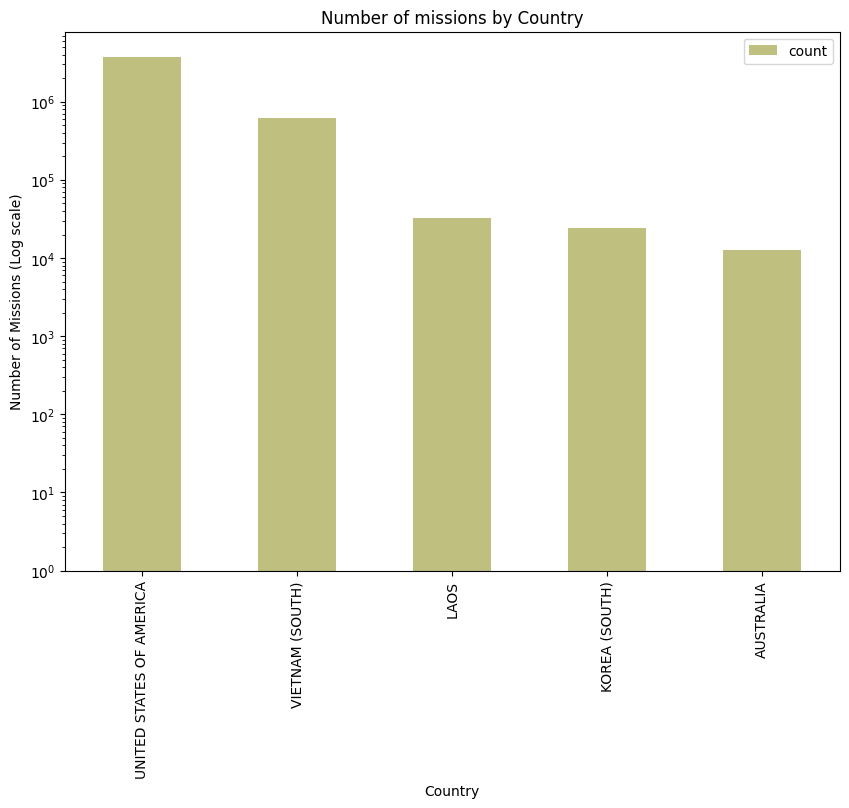

In [ ]:
pl = missions_count_pd.plot(kind="bar",
                            x="ContryFlyingMission", y="count",
                            figsize=(10, 7), log=True, alpha=0.5, color="olive")
pl.set_xlabel("Country")
pl.set_ylabel("Number of Missions (Log scale)")
pl.set_title("Number of missions by Country")

----

## Questions 2: Show the number of missions in time for each of the countries involved.
## 매일 얼마나 많은 임무에 참가했는지 나라별로 구하시오.
Keywords: `group by`, `parse date`, `plot`

Let's select the relevant columns:

In [ ]:
# 그림 그리기 실패하는 코드
grouped = Bombing_Operations.groupBy(["MissionDate", "ContryFlyingMission"])
counts = grouped.count()
counts = counts.sort("MissionDate")
counts.show()

+-----------+--------------------+-----+
|MissionDate| ContryFlyingMission|count|
+-----------+--------------------+-----+
| 1965-10-01|UNITED STATES OF ...|  447|
| 1965-10-02|UNITED STATES OF ...|  652|
| 1965-10-03|UNITED STATES OF ...|  608|
| 1965-10-04|UNITED STATES OF ...|  532|
| 1965-10-05|     VIETNAM (SOUTH)|   72|
| 1965-10-05|UNITED STATES OF ...|  697|
| 1965-10-06|     VIETNAM (SOUTH)|   49|
| 1965-10-06|UNITED STATES OF ...|  689|
| 1965-10-07|UNITED STATES OF ...|  605|
| 1965-10-07|     VIETNAM (SOUTH)|   50|
| 1965-10-08|     VIETNAM (SOUTH)|   64|
| 1965-10-08|UNITED STATES OF ...|  700|
| 1965-10-09|UNITED STATES OF ...|  677|
| 1965-10-09|     VIETNAM (SOUTH)|   69|
| 1965-10-10|UNITED STATES OF ...|  789|
| 1965-10-10|     VIETNAM (SOUTH)|   59|
| 1965-10-11|     VIETNAM (SOUTH)|   48|
| 1965-10-11|UNITED STATES OF ...|  455|
| 1965-10-12|     VIETNAM (SOUTH)|   62|
| 1965-10-12|UNITED STATES OF ...|  449|
+-----------+--------------------+-----+
only showing top

In [ ]:
# Pandas로 변환
counts_pd = counts.toPandas()

In [ ]:
counts_pd.head()

,MissionDate,ContryFlyingMission,count
0,1965-10-01,UNITED STATES OF AMERICA,447
1,1965-10-02,UNITED STATES OF AMERICA,652
2,1965-10-03,UNITED STATES OF AMERICA,608
3,1965-10-04,UNITED STATES OF AMERICA,532
4,1965-10-05,VIETNAM (SOUTH),72


In [ ]:
for country, missions in counts_pd.groupby("ContryFlyingMission"):
  print(country)
  print(missions.head())

AUSTRALIA
     MissionDate ContryFlyingMission  count
2977  1970-01-02           AUSTRALIA     22
2981  1970-01-03           AUSTRALIA     24
2982  1970-01-04           AUSTRALIA     23
2985  1970-01-05           AUSTRALIA     22
2988  1970-01-06           AUSTRALIA     22
KOREA (SOUTH)
     MissionDate ContryFlyingMission  count
6692  1972-10-15       KOREA (SOUTH)     16
6695  1972-10-16       KOREA (SOUTH)     11
6701  1972-10-17       KOREA (SOUTH)     12
6706  1972-10-18       KOREA (SOUTH)     17
6707  1972-10-19       KOREA (SOUTH)     19
LAOS
     MissionDate ContryFlyingMission  count
3124  1970-02-20                LAOS     51
3126  1970-02-21                LAOS     55
3130  1970-02-22                LAOS     21
3135  1970-02-23                LAOS     49
3138  1970-02-24                LAOS     40
UNITED STATES OF AMERICA
  MissionDate       ContryFlyingMission  count
0  1965-10-01  UNITED STATES OF AMERICA    447
1  1965-10-02  UNITED STATES OF AMERICA    652
2  1965-10-03

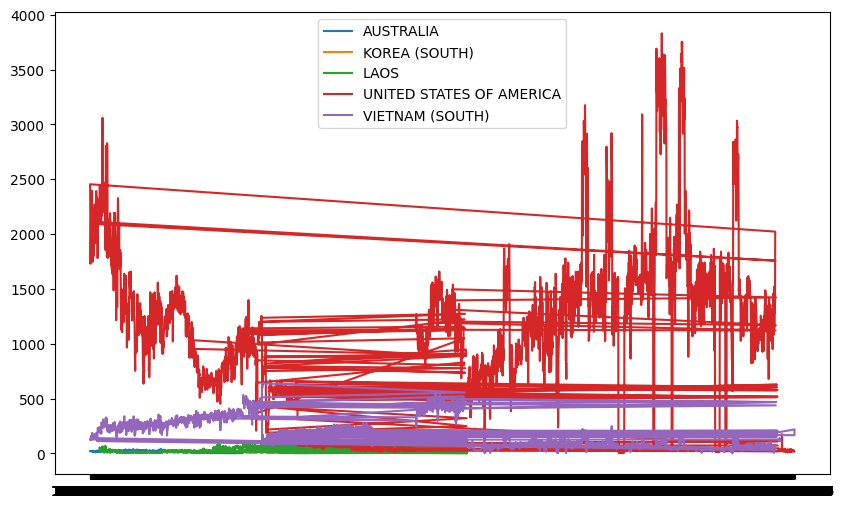

In [ ]:
fig = plt.figure(figsize=(10, 6))

# iterate the different groups to create a different series
for country, missions in counts_pd.groupby("ContryFlyingMission"):
    plt.plot(missions["MissionDate"], missions["count"], label=country)

plt.legend(loc='best')

그래프가 다소 이상한 이유 => x좌표로 삼은 MissionDate가 String형이기 때문

In [ ]:
# 문자열을 date로 변환하면서 일자와 국가 두 개의 열만 가져오는 코드
missions_countries = Bombing_Operations.selectExpr(["to_date(MissionDate) as MissionDate", "ContryFlyingMission"])
missions_countries.printSchema()

root
 |-- MissionDate: date (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)



The filed MissionDate is converted to a Python `date` object.

Now we can group by `MissionDate` and `ContryFlyingMission` to get the count:

In [ ]:
# 일자와 국가가 같은 데이터 모으기
grouped = missions_countries.groupBy(["MissionDate", "ContryFlyingMission"])

In [ ]:
# 데이터의 개수 세기
counts = grouped.count()
counts.show()

+-----------+--------------------+-----+
|MissionDate| ContryFlyingMission|count|
+-----------+--------------------+-----+
| 1971-10-05|UNITED STATES OF ...|  650|
| 1972-10-26|UNITED STATES OF ...|  921|
| 1972-03-04|UNITED STATES OF ...| 1084|
| 1973-11-03|     VIETNAM (SOUTH)|  192|
| 1970-03-27|UNITED STATES OF ...| 2466|
| 1970-12-28|     VIETNAM (SOUTH)|  291|
| 1971-10-14|     VIETNAM (SOUTH)|  386|
| 1973-10-05|UNITED STATES OF ...|  105|
| 1973-12-05|     VIETNAM (SOUTH)|  197|
| 1971-07-15|     VIETNAM (SOUTH)|  336|
| 1973-10-29|     VIETNAM (SOUTH)|  207|
| 1972-05-01|UNITED STATES OF ...| 1537|
| 1974-02-13|     VIETNAM (SOUTH)|  250|
| 1971-09-25|     VIETNAM (SOUTH)|  354|
| 1972-03-07|UNITED STATES OF ...| 1034|
| 1974-03-26|UNITED STATES OF ...|   79|
| 1971-07-31|     VIETNAM (SOUTH)|  347|
| 1970-08-10|UNITED STATES OF ...| 1268|
| 1970-03-06|     VIETNAM (SOUTH)|  259|
| 1970-11-03|           AUSTRALIA|   21|
+-----------+--------------------+-----+
only showing top

In [ ]:
# 정렬하기
counts = counts.sort("MissionDate")
counts.show()

+-----------+--------------------+-----+
|MissionDate| ContryFlyingMission|count|
+-----------+--------------------+-----+
| 1965-10-01|UNITED STATES OF ...|  447|
| 1965-10-02|UNITED STATES OF ...|  652|
| 1965-10-03|UNITED STATES OF ...|  608|
| 1965-10-04|UNITED STATES OF ...|  532|
| 1965-10-05|UNITED STATES OF ...|  697|
| 1965-10-05|     VIETNAM (SOUTH)|   72|
| 1965-10-06|     VIETNAM (SOUTH)|   49|
| 1965-10-06|UNITED STATES OF ...|  689|
| 1965-10-07|UNITED STATES OF ...|  605|
| 1965-10-07|     VIETNAM (SOUTH)|   50|
| 1965-10-08|UNITED STATES OF ...|  700|
| 1965-10-08|     VIETNAM (SOUTH)|   64|
| 1965-10-09|     VIETNAM (SOUTH)|   69|
| 1965-10-09|UNITED STATES OF ...|  677|
| 1965-10-10|     VIETNAM (SOUTH)|   59|
| 1965-10-10|UNITED STATES OF ...|  789|
| 1965-10-11|     VIETNAM (SOUTH)|   48|
| 1965-10-11|UNITED STATES OF ...|  455|
| 1965-10-12|UNITED STATES OF ...|  449|
| 1965-10-12|     VIETNAM (SOUTH)|   62|
+-----------+--------------------+-----+
only showing top

In [ ]:
missions_by_date = missions_countries\
                    .groupBy(["MissionDate", "ContryFlyingMission"])\
                    .agg(count("*").alias("MissionsCount"))\
                    .sort(asc("MissionDate"))
missions_by_date.show()

+-----------+--------------------+-------------+
|MissionDate| ContryFlyingMission|MissionsCount|
+-----------+--------------------+-------------+
| 1965-10-01|UNITED STATES OF ...|          447|
| 1965-10-02|UNITED STATES OF ...|          652|
| 1965-10-03|UNITED STATES OF ...|          608|
| 1965-10-04|UNITED STATES OF ...|          532|
| 1965-10-05|UNITED STATES OF ...|          697|
| 1965-10-05|     VIETNAM (SOUTH)|           72|
| 1965-10-06|     VIETNAM (SOUTH)|           49|
| 1965-10-06|UNITED STATES OF ...|          689|
| 1965-10-07|UNITED STATES OF ...|          605|
| 1965-10-07|     VIETNAM (SOUTH)|           50|
| 1965-10-08|UNITED STATES OF ...|          700|
| 1965-10-08|     VIETNAM (SOUTH)|           64|
| 1965-10-09|     VIETNAM (SOUTH)|           69|
| 1965-10-09|UNITED STATES OF ...|          677|
| 1965-10-10|     VIETNAM (SOUTH)|           59|
| 1965-10-10|UNITED STATES OF ...|          789|
| 1965-10-11|     VIETNAM (SOUTH)|           48|
| 1965-10-11|UNITED 

Now we can plot the content with a different series for each country:

In [ ]:
# Pandas로 변환
counts_pd = counts.toPandas()

In [ ]:
counts_pd.head(10)

,MissionDate,ContryFlyingMission,count
0,1965-10-01,UNITED STATES OF AMERICA,447
1,1965-10-02,UNITED STATES OF AMERICA,652
2,1965-10-03,UNITED STATES OF AMERICA,608
3,1965-10-04,UNITED STATES OF AMERICA,532
4,1965-10-05,UNITED STATES OF AMERICA,697
5,1965-10-05,VIETNAM (SOUTH),72
6,1965-10-06,UNITED STATES OF AMERICA,689
7,1965-10-06,VIETNAM (SOUTH),49
8,1965-10-07,VIETNAM (SOUTH),50
9,1965-10-07,UNITED STATES OF AMERICA,605


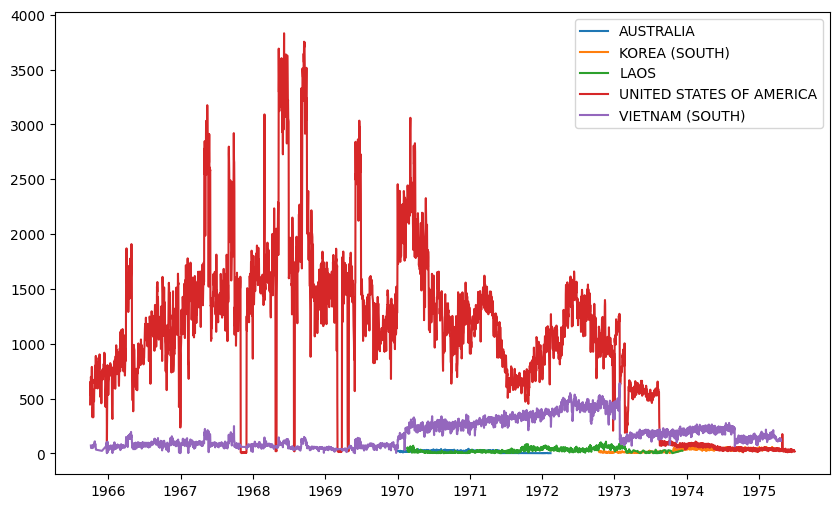

In [ ]:
fig = plt.figure(figsize=(10, 6))

# iterate the different groups to create a different series
for country, missions in counts_pd.groupby("ContryFlyingMission"):
    plt.plot(missions["MissionDate"], missions["count"], label=country)

plt.legend(loc='best')

We can observe how South Vietnam increased its missions starting from 1970. The drop in 1973 is motivated by the [Paris Peace Accords](https://en.wikipedia.org/wiki/Paris_Peace_Accords) that took place on January 27th, 1973, to establish peace in Vietnam and end the war.

----

## Question 3: Who bombed this location?
## 폭격을 주도한 비행기들이 어느 위치에서 이륙했는가?
Keywords: `RDD map reduce` `cache` `save results`

<img style="float: right;" src="https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/Hanoi_POL1966.jpg">

This picture is the Hanoi POL facility (North Vietnam) burning after it was attacked by the U.S. Air Force on 29 June 1966 in the context of the Rolling Thunder operation.

We are interested in discovering what was the most common take-off location during that day.

In [ ]:
Bombing_Operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              NULL|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                NULL|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              NULL|          D|       UDORN AB|         LAOS|       730.0|                NULL|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [ ]:
# 북베트남을 타겟으로 한 1966년 6월 29일 임무들만 선택
jun_29_operations = Bombing_Operations.where("MissionDate = '1966-06-29' AND TargetCountry='NORTH VIETNAM'")
jun_29_operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|    WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|   F-105|UNITED STATES OF ...| 1966-06-29|       STEEL TIGER|          D|         TAKHLI|NORTH VIETNAM|       310.0|  1000LB MK-83|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|         DANANG|NORTH VIETNAM|      1226.0|          NULL|                 -1|
|     F-4|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          D|  CONSTELLATION|NORTH VIETNAM|       703.0| 2.75IN HE RKT|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|        

Which coutries scheduled missions that day?

In [ ]:
# 나라별로 묶기
grouped = jun_29_operations.groupBy("ContryFlyingMission")

In [ ]:
# 숫자 세기
counts = grouped.count()
counts.show()

+--------------------+-----+
| ContryFlyingMission|count|
+--------------------+-----+
|     VIETNAM (SOUTH)|    6|
|UNITED STATES OF ...|  389|
+--------------------+-----+



In [ ]:
jun_29_operations.groupBy("ContryFlyingMission").count().toPandas()

,ContryFlyingMission,count
0,VIETNAM (SOUTH),6
1,UNITED STATES OF AMERICA,389


In [ ]:
jun_29_operations.groupBy("ContryFlyingMission").agg(count("*").alias("MissionsCount")).toPandas()

Most of the operation that day were performed by USA airplanes.

In [ ]:
# 출발 장소로 묶기
grouped = jun_29_operations.groupBy("TakeoffLocation")

In [ ]:
# 숫자 세기
counts = grouped.count()
counts.show()

+----------------+-----+
| TakeoffLocation|count|
+----------------+-----+
|    TAN SON NHUT|   26|
|          DANANG|   35|
|        UDORN AB|   44|
|HANCOCK (CVA-19)|   10|
|   CONSTELLATION|   87|
|          TAKHLI|   56|
|         CUBI PT|    1|
|          RANGER|   35|
|           KORAT|   55|
|         UBON AB|   44|
|    CAM RANH BAY|    2|
+----------------+-----+



In [ ]:
# 정렬하기
counts = counts.sort(desc('count'))
counts.show()

+----------------+-----+
| TakeoffLocation|count|
+----------------+-----+
|   CONSTELLATION|   87|
|          TAKHLI|   56|
|           KORAT|   55|
|        UDORN AB|   44|
|         UBON AB|   44|
|          DANANG|   35|
|          RANGER|   35|
|    TAN SON NHUT|   26|
|HANCOCK (CVA-19)|   10|
|    CAM RANH BAY|    2|
|         CUBI PT|    1|
+----------------+-----+



<img style="float: right;" src="https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/USS_Constellation.jpg">


That day the most common take-off location was the ship USS Constellation (CV-64). We cannot univocally identify one take off location, but we can reduce the possible candidates. Next steps: explore TimeOnTarget feature.

_USS Constellation (CV-64), a Kitty Hawk-class supercarrier, was the third ship of the United States Navy to be named in honor of the "new constellation of stars" on the flag of the United States. One of the fastest ships in the Navy, as proven by her victory during a battlegroup race held in 1985, she was nicknamed "Connie" by her crew and officially as "America's Flagship"._

### RDD 이용하기

In [ ]:
jun_29_operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|    WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|   F-105|UNITED STATES OF ...| 1966-06-29|       STEEL TIGER|          D|         TAKHLI|NORTH VIETNAM|       310.0|  1000LB MK-83|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|         DANANG|NORTH VIETNAM|      1226.0|          NULL|                 -1|
|     F-4|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          D|  CONSTELLATION|NORTH VIETNAM|       703.0| 2.75IN HE RKT|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|        

In [ ]:
type(jun_29_operations)

pyspark.sql.dataframe.DataFrame

In [ ]:
rdd = jun_29_operations.rdd

In [ ]:
rdd.collect()

[Row(AirCraft='F-105', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='STEEL TIGER', PeriodOfDay='D', TakeoffLocation='TAKHLI', TargetCountry='NORTH VIETNAM', TimeOnTarget=310.0, WeaponType='1000LB MK-83', WeaponsLoadedWeight=-1),
 Row(AirCraft='C-130', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='N', TakeoffLocation='DANANG', TargetCountry='NORTH VIETNAM', TimeOnTarget=1226.0, WeaponType=None, WeaponsLoadedWeight=-1),
 Row(AirCraft='F-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='D', TakeoffLocation='CONSTELLATION', TargetCountry='NORTH VIETNAM', TimeOnTarget=703.0, WeaponType='2.75IN HE RKT', WeaponsLoadedWeight=-1),
 Row(AirCraft='C-130', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='N', TakeoffLocation='UBON

In [ ]:
rdd.take(10)

[Row(AirCraft='F-105', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='STEEL TIGER', PeriodOfDay='D', TakeoffLocation='TAKHLI', TargetCountry='NORTH VIETNAM', TimeOnTarget=310.0, WeaponType='1000LB MK-83', WeaponsLoadedWeight=-1),
 Row(AirCraft='C-130', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='N', TakeoffLocation='DANANG', TargetCountry='NORTH VIETNAM', TimeOnTarget=1226.0, WeaponType=None, WeaponsLoadedWeight=-1),
 Row(AirCraft='F-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='D', TakeoffLocation='CONSTELLATION', TargetCountry='NORTH VIETNAM', TimeOnTarget=703.0, WeaponType='2.75IN HE RKT', WeaponsLoadedWeight=-1),
 Row(AirCraft='C-130', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='ROLLING THUN', PeriodOfDay='N', TakeoffLocation='UBON

In [ ]:
all_locations = jun_29_operations.rdd.map(lambda row: (row.TakeoffLocation, 1))
all_locations.take(3)

[('TAKHLI', 1), ('DANANG', 1), ('CONSTELLATION', 1)]

In [ ]:
locations_counts_rdd = all_locations.reduceByKey(lambda a, b: a + b).sortBy(lambda r: -r[1]) # 음수를 붙힌 오름차순 => 내림차순
locations_counts_rdd.take(3)

[('CONSTELLATION', 87), ('TAKHLI', 56), ('KORAT', 55)]

In [ ]:
locations_counts_with_schema = locations_counts_rdd.map(lambda r: Row(TakeoffLocation=r[0], MissionsCount=r[1]))
locations_counts = spark.createDataFrame(locations_counts_with_schema)
locations_counts.show()

+----------------+-------------+
| TakeoffLocation|MissionsCount|
+----------------+-------------+
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|           KORAT|           55|
|         UBON AB|           44|
|        UDORN AB|           44|
|          DANANG|           35|
|          RANGER|           35|
|    TAN SON NHUT|           26|
|HANCOCK (CVA-19)|           10|
|    CAM RANH BAY|            2|
|         CUBI PT|            1|
+----------------+-------------+



----

## Questions 4: What is the most used aircraft type during the Vietnam war (number of missions)?
## 베트남 전쟁에서 가장 많이 사용된 기체타입은?
Keywords: `join` `group by`

Let's check the content of `Aircraft_Glossary`:

In [ ]:
Aircraft_Glossary.show(5)

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
+--------+--------------------+--------------------+
only showing top 5 rows



We are interested in the filed `AirCraftType`.

In [ ]:
Bombing_Operations.select("AirCraft").show(5)

+--------+
|AirCraft|
+--------+
|   EC-47|
|   EC-47|
|    RF-4|
|     A-1|
|    A-37|
+--------+
only showing top 5 rows



We can join on the column `AirCraft` of both dataframes.

With Dataframe API:

In [ ]:
# 테이블 이어붙이기
missions_joined = Bombing_Operations.join(Aircraft_Glossary,
                                          Bombing_Operations.AirCraft == Aircraft_Glossary.AirCraft)
missions_joined

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint, AirCraft: string, AirCraftName: string, AirCraftType: string]

In [ ]:
# 합쳐진 테이블
missions_joined.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|   EC-47|Douglas C-47 Skyt...|Military Transpor...|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              NULL|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                NULL|                  0|  

In [ ]:
# 기체타입으로 묶어서 세기
grouped = missions_joined.groupBy("AirCraftType")
counts = grouped.count()
counts.show()

+--------------------+------+
|        AirCraftType| count|
+--------------------+------+
|Carrier-based Fig...| 58691|
|  Utility Prop plane|     5|
|Early Warning air...|  1380|
|Military Transpor...|228426|
|Heavy strategic b...|     2|
|Airliner/transpor...|   397|
|    Cargo Prop plane|   176|
|        Light Bomber| 39262|
|  Transport Aircraft|     7|
| Airliner/ Transport|     1|
|Airborne early wa...| 17226|
|  Jet Fighter Bomber|451385|
|Weather reconnais...|  1223|
|Fixed wing ground...| 75058|
|        Fighter jet | 10322|
|Photographic reco...|  7800|
| Light Utility Plane| 28582|
|Close air support...|   921|
|     Tactical Bomber| 82219|
|          Bomber Jet|     8|
+--------------------+------+
only showing top 20 rows



In [ ]:
# 정렬하기
counts = counts.sort(desc("count"))
counts.show()

+--------------------+-------+
|        AirCraftType|  count|
+--------------------+-------+
|  Fighter Jet Bomber|1073126|
|         Fighter Jet| 882594|
|  Jet Fighter Bomber| 451385|
|     Attack Aircraft| 315246|
|Light ground-atta...| 267457|
|  Fighter bomber jet| 242231|
|Military Transpor...| 228426|
|  Utility Helicopter| 146653|
|    Strategic bomber|  99100|
|     Tactical Bomber|  82219|
|Observation Aircraft|  81820|
|Fixed wing ground...|  75058|
|Ground attack air...|  73843|
|Carrier-based Fig...|  58691|
|   Training Aircraft|  48435|
|       Light fighter|  39999|
|        Light Bomber|  39262|
|Light Tactical Bo...|  34738|
| Light Utility Plane|  28582|
|Observation/ Ligh...|  24491|
+--------------------+-------+
only showing top 20 rows



In alternative we can rewrite this in pure SQL:

In [ ]:
Bombing_Operations.registerTempTable("Bombing_Operations")
Aircraft_Glossary.registerTempTable("Aircraft_Glossary")

query = """
SELECT AirCraftType, count(*) MissionsCount
FROM Bombing_Operations bo
JOIN Aircraft_Glossary ag
ON bo.AirCraft = ag.AirCraft
GROUP BY AirCraftType
ORDER BY MissionsCount DESC
"""

spark.sql(query).show()

The aircrafts of type `Fighter Jet Bomber` participated in most of the missions in the Vietnam war.

Note: This dataset would require further cleaning and normalization. See `Fighter Jet Bomber`, `Jet Fighter Bomber`, `Fighter bomber jet`